In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [7]:
q = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(q, conn)

,name
0,Antarctica


In [8]:
q = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(q, conn)

,name
0,World


It looks like Antarctica has a population of zero and the world population is counted in here.  Neither are "countries" so should be exluced from the table.

In [6]:
q = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != 7256490011 AND population != 0"
population_data = pd.read_sql_query(q, conn)

0.0


/dataquest/system/env/python3/lib/python3.4/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/dataquest/system/env/python3/lib/python3.4/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

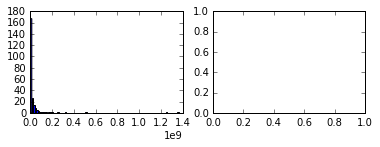

In [7]:

fig = plt.figure()
ax1=plt.subplot(2,2,1)
ax1.hist(population_data['population'],bins=100)
ax2=plt.subplot(2,2,2)
ax2.hist(population_data['population_growth'])
ax3=plt.subplot(2,2,3)
ax3.hist(population_data['birth_rate'],bins=100)
ax4=plt.subplot(2,2,4)
ax4.hist(population_data['death_rate'],bins=100)
plt.show()

In [ ]:
type(population_data['population'])

In [23]:
for i in range(1,5):
    print(i)

1
2
3
4
